In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn

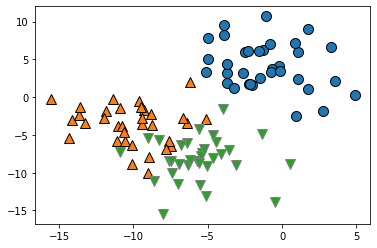

In [2]:
X,y = make_blobs(random_state=1,cluster_std=3)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [3]:
y_pred = KMeans(n_clusters=3).fit_predict(X)

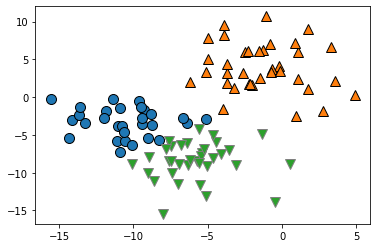

In [4]:
mglearn.discrete_scatter(X[:,0],X[:,1],y_pred)

In [5]:
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_)

NameError: name 'kmeans' is not defined

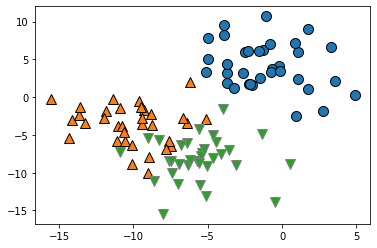

In [6]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)

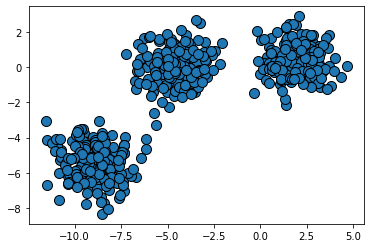

In [7]:
import numpy as np
X,y = make_blobs(random_state=170, n_samples=600)
mglearn.discrete_scatter(X[:,0],X[:,1])

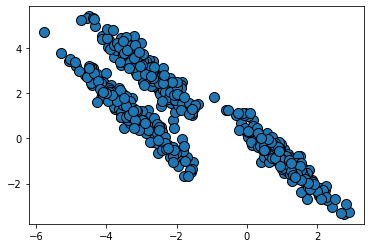

In [8]:
rng= np.random.RandomState(74)
transformation = rng.normal(size=(2,2))
X=np.dot(X,transformation)
mglearn.discrete_scatter(X[:,0],X[:,1])

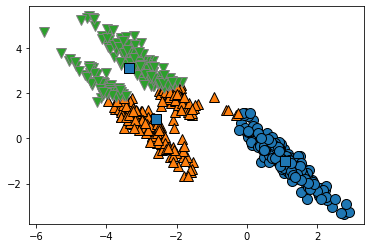

In [9]:
kmeans = KMeans(n_clusters=3).fit(X)
y_pred = kmeans.predict(X)
mglearn.discrete_scatter(X[:,0],X[:,1],y_pred)
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                        kmeans.cluster_centers_[:,1],
                        markers="s")

In [10]:
kmeans.cluster_centers_

array([[ 1.07294254, -0.98167966],
       [-2.59050892,  0.87997461],
       [-3.36538693,  3.14120184]])

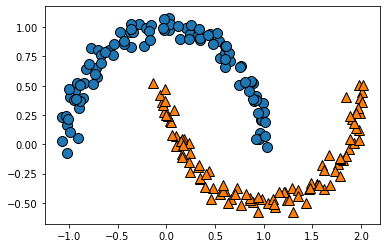

In [11]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise= 0.05, random_state=0)

model = KMeans(n_clusters=2).fit(X)
y_ = model.predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1],y)

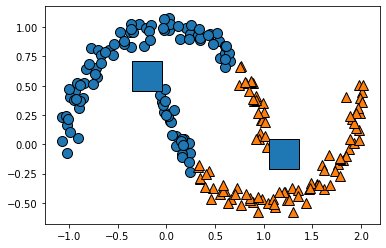

In [12]:
mglearn.discrete_scatter(X[:,0], X[:,1],y_)
mglearn.discrete_scatter(model.cluster_centers_[:,0],
                        model.cluster_centers_[:,1],
                        markers='s',s="30")


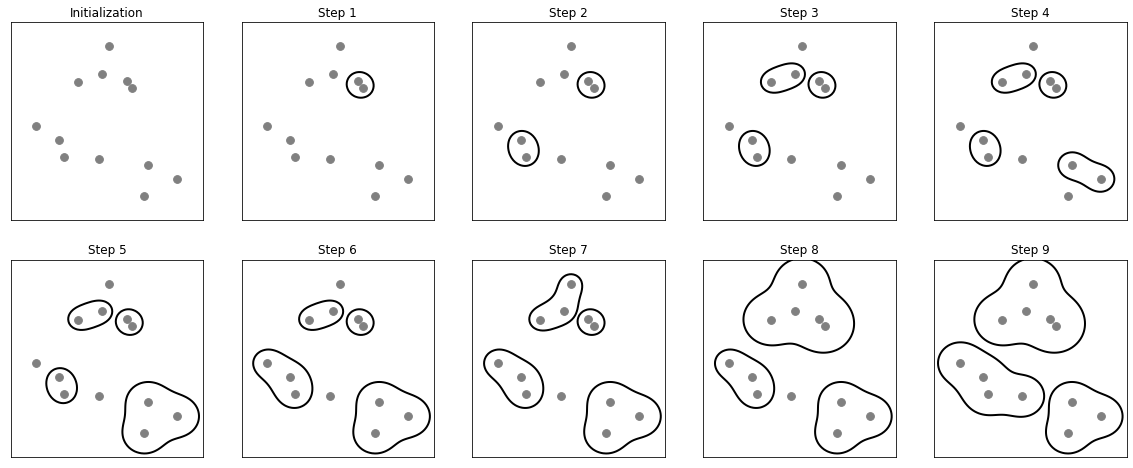

In [13]:
mglearn.plots.plot_agglomerative_algorithm()

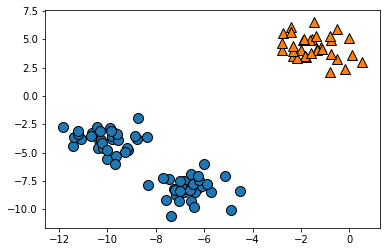

In [14]:
from sklearn.cluster import AgglomerativeClustering
X,y = make_blobs(random_state=1)
agg_model = AgglomerativeClustering()
y_ = agg_model.fit_predict(X)
mglearn.discrete_scatter(X[:,0], X[:,1],y_)

In [15]:
#c12 kmeans 군집 마케팅 분석
import pandas as pd
import math

In [16]:
retail_df = pd.read_excel("Online Retail.xlsx")

In [17]:
retail_df[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
retail_df = retail_df[retail_df['Quantity']>0]
retail_df = retail_df[retail_df['UnitPrice']>0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]


In [19]:
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [20]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [21]:
retail_df.shape

(397884, 8)

In [22]:
retail_df.drop_duplicates(inplace=True)

In [23]:
retail_df.shape

(392692, 8)

In [24]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [25]:
retail_df['SaleAmount'] = retail_df['UnitPrice']*retail_df['Quantity']

In [26]:
work_table = {
    'InvoiceNo' : 'count',
    'SaleAmount' : 'sum',
    'InvoiceDate' : 'max'
    
}
customer_df = retail_df.groupby('CustomerID').agg(work_table)
customer_df = customer_df.reset_index()
customer_df.head()

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [27]:
customer_df = customer_df.rename(columns = {'InvoiceNo':'Freq',
                                           'InvoiceDate':'ElapsedDays'})
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [28]:
import datetime
customer_df['ElapsedDays'] = datetime.datetime(2011,12,10)-customer_df['ElapsedDays']

In [29]:
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x: x.days+1)

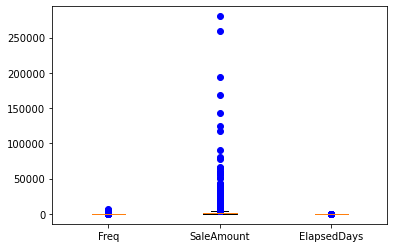

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots()
ax.boxplot([customer_df['Freq'],customer_df['SaleAmount'], customer_df['ElapsedDays']],sym = 'bo')
plt.xticks([1,2,3],['Freq', 'SaleAmount','ElapsedDays'])
plt.show()

In [31]:
import numpy as np

customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])

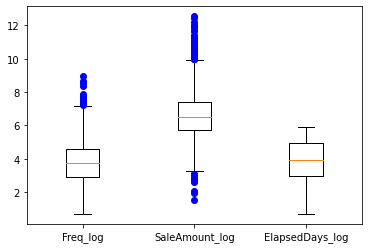

In [32]:
fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq_log'], customer_df['SaleAmount_log'],customer_df['ElapsedDays_log']], sym='bo')
plt.xticks([1,2,3],['Freq_log','SaleAmount_log','ElapsedDays_log'])
plt.show()

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [34]:
X = customer_df[['Freq_log','SaleAmount_log','ElapsedDays_log']].values
X

array([[ 0.69314718, 11.25395523,  5.78996017],
       [ 5.20948615,  8.36892517,  1.38629436],
       [ 3.4657359 ,  7.49456369,  4.34380542],
       ...,
       [ 2.56494936,  5.1876651 ,  2.19722458],
       [ 6.58202514,  7.62390095,  1.60943791],
       [ 4.26267988,  7.51658563,  3.78418963]])

In [35]:
from sklearn.preprocessing import StandardScaler
X_s = StandardScaler().fit_transform(X)

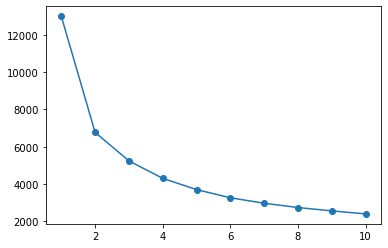

In [36]:
distortions = []
for i in range(1,11):
    kmeans_model_i = KMeans(n_clusters=i, random_state=0)
    kmeans_model_i.fit(X_s)
    distortions.append(kmeans_model_i.inertia_)
plt.plot(range(1,11), distortions,marker='o')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=3,random_state=0)
Y_labels = kmeans.fit_predict(X_s)

In [38]:
customer_df['ClusterLabel'] = Y_labels

In [42]:
from matplotlib import cm
def silhouetteViz(n_cluster,X):
    kmeans = KMeans(n_clusters = n_cluster,random_state = 0)
    Y_labels = kmeans.fit_predict(X)
    
    silhouette_values = silhouette_samples(X,Y_labels,metric = 'euclidean')
    
    y_ax_lower,y_ax_upper = 0, 0
    y_ticks=[]
    
    for c in range(n_cluster):
        c_silhouettes =silhouette_values[Y_labels ==c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c)/n_cluster)
        plt.barh(range(y_ax_lower,y_ax_upper), c_silhouettes,height=1.0,edgecolor='none', color=color)
        y_ticks.append((y_ax_lower+y_ax_upper)/2.)
        y_ax_lower += len(c_silhouettes)
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg,color='red',linestyle='--')
    plt.yticks(y_ticks,range(n_cluster))
    plt.xticks([0,0.2,0.4,0.6,0.8,1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

In [48]:
def clusterScatter(n_cluster,X):
    c_colors = []
    kmeans = KMeans(n_clusters = n_cluster, random_state=0)
    y_ = kmeans.fit_predict(X)
    
    for i in range(n_cluster):
        c_color = cm.jet(float(i)/n_cluster)
        c_colors.append(c_color)
        plt.scatter(X[Y_labels == i,0],X[Y_labels == i,1], marker ='o', color = c_color,edgecolor = 'black',s=50,
                    label ='cluster' + str(i))
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i,1],marker='^', color = c_colors[i], edgecolor='w',s= 200)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

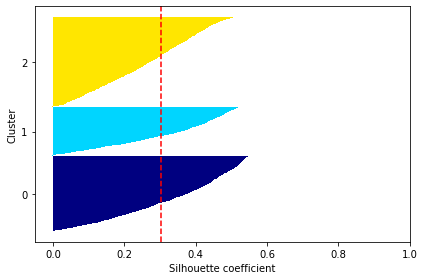

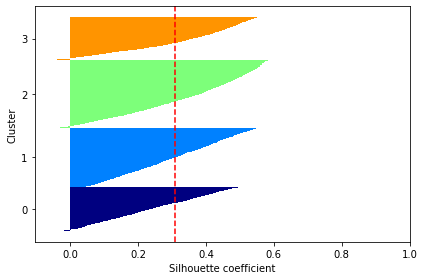

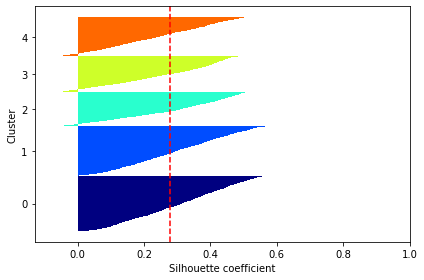

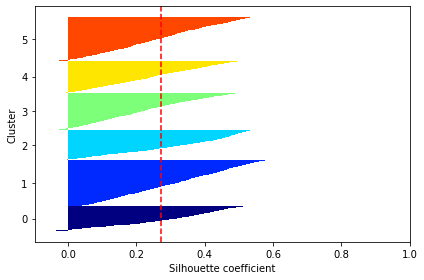

In [44]:
silhouetteViz(3,X_s)
silhouetteViz(4,X_s)
silhouetteViz(5,X_s)
silhouetteViz(6,X_s)


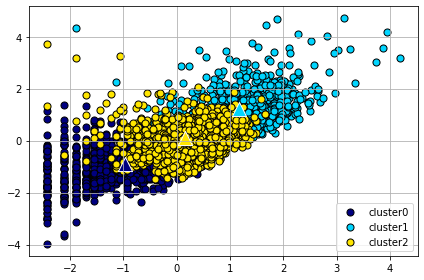

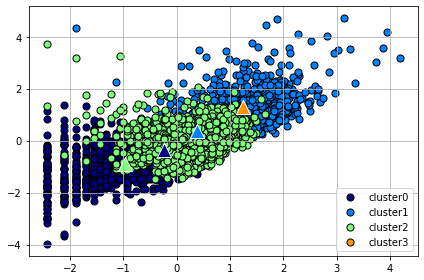

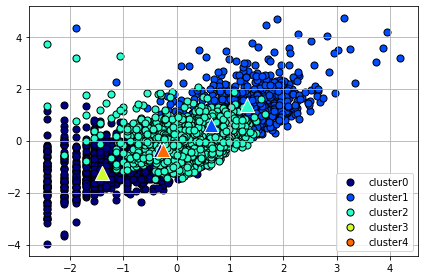

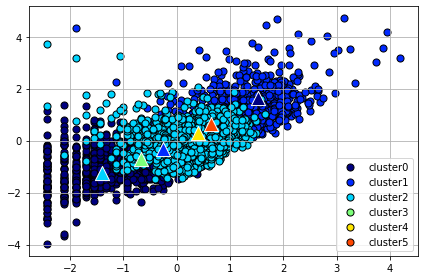

In [49]:
clusterScatter(3,X_s)
clusterScatter(4,X_s)
clusterScatter(5,X_s)
clusterScatter(6,X_s)

In [50]:
best_cluster = 4
kmeans = KMeans(n_clusters=best_cluster,random_state=0)
y_ = kmeans.fit_predict(X_s)

In [51]:
customer_df['ClusterLabel']= y_
customer_df[:10]

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,1
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,3
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,1
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,1
4,12350,17,334.40,311,2.890372,5.815324,5.743003,2
5,12352,85,2506.04,37,4.454347,7.826858,3.637586,1
6,12353,4,89.00,205,1.609438,4.499810,5.327876,2
7,12354,58,1079.40,233,4.077537,6.985087,5.455321,1
8,12355,13,459.40,215,2.639057,6.132096,5.375278,2
9,12356,59,2811.43,23,4.094345,7.941804,3.178054,1


In [52]:
customer_df.to_csv('Online_Retail_Customer_Cluster.csv')

In [53]:
customer_df.groupby('ClusterLabel')['CustomerID'].count()

ClusterLabel
0     891
1    1207
2    1368
3     872
Name: CustomerID, dtype: int64

In [56]:
customer_cluster_df = customer_df.drop(['Freq_log','SaleAmount_log','ElapsedDays_log'],axis=1,inplace = False)

In [57]:
customer_cluster_df['SaleAmountAvg'] = customer_cluster_df['SaleAmount']/customer_cluster_df['Freq']

In [58]:
customer_cluster_df.drop(['CustomerID'],axis=1,inplace =False).groupby('ClusterLabel').mean()

,Freq,SaleAmount,ElapsedDays,SaleAmountAvg
ClusterLabel,,,,
0,37.811448,603.494053,20.888889,32.256335
1,79.195526,1506.813034,96.000829,102.998219
2,15.052632,298.748151,188.111842,43.338802
3,278.464450,7020.739553,13.612385,96.665836
